In [ ]:
from aif360.datasets import CompasDataset
from aif360.metrics import BinaryLabelDatasetMetric
# Load the COMPAS dataset
compas_dataset = CompasDataset()

# Convert the dataset to a DataFrame
dataframe, _ = compas_dataset.convert_to_dataframe()
print(dataframe.head())


[0. 1.]


In [ ]:

# Convert to BinaryLabelDataset
# binary_label_dataset = compas_dataset.convert_to_binary_label_dataset()

# Create a BinaryLabelDatasetMetric object
metric = BinaryLabelDatasetMetric(compas_dataset, 
                                   privileged_groups=[{'sex': 1.0}], 
                                   unprivileged_groups=[{'sex': 0.0}])

# Print various fairness metrics
print(f"Disparate Impact: {metric.disparate_impact()}")
print(f"Statistical Parity Difference: {metric.statistical_parity_difference()}")
print(f"Mean Difference: {metric.mean_difference()}")
# print(metric.)

Disparate Impact: 0.8029250890542334
Statistical Parity Difference: -0.12768706932547536
Mean Difference: -0.12768706932547536


!pip install tensorflow

In [ ]:
# !pip install tensorflow

In [ ]:
from aif360.datasets import CompasDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing
import pandas as pd
import numpy as np

# Load the COMPAS dataset
dataset = CompasDataset()

# Calculate metrics on the original dataset
privileged_groups = [{'race': 1}]  # 1 represents Caucasian
unprivileged_groups = [{'race': 0}]  # 0 represents African-American

metrics = BinaryLabelDatasetMetric(dataset, 
                                 unprivileged_groups=unprivileged_groups,
                                 privileged_groups=privileged_groups)

# Calculate various fairness metrics
disparate_impact = metrics.disparate_impact()
statistical_parity_difference = metrics.statistical_parity_difference()
mean_difference = metrics.mean_difference()

# Print the fairness metrics with descriptions
print("Fairness Metrics for COMPAS Dataset:")
print("-" * 50)
print("\n1. Disparate Impact:")
print(f"Value: {disparate_impact:.4f}")
print("Description: Ratio of favorable outcomes between unprivileged and privileged groups")
print("Interpretation: A value of 1.0 indicates perfect fairness. Values < 1 suggest bias against unprivileged group")

print("\n2. Statistical Parity Difference:")
print(f"Value: {statistical_parity_difference:.4f}")
print("Description: Difference in probability of favorable outcomes between groups")
print("Interpretation: Value of 0 indicates perfect fairness. Negative values indicate bias against unprivileged group")

print("\n3. Mean Difference:")
print(f"Value: {mean_difference:.4f}")
print("Description: Difference in mean predictions between privileged and unprivileged groups")
print("Interpretation: Value of 0 indicates perfect fairness")

# Calculate group-specific metrics

#meta data
# params
#   'protected_attribute_names': ['sex', 'race'],
#   'unprivileged_protected_attributes': [array([0.]), array([0.])],
#   'privileged_protected_attributes': [array([1.]), array([1.])]},

privileged_metrics = dataset.metadata['params']['privileged_protected_attributes']
unprivileged_metrics = dataset.metadata['params']['unprivileged_protected_attributes']
# what to do with the above?
# Calculate metrics for privileged and unprivileged groups


print("\n4. Group-specific Statistics:")
print(f"Total number of samples: {len(dataset.features)}")
print(f"Favorable label: {dataset.favorable_label}")
print(f"Unfavorable label: {dataset.unfavorable_label}")

# Calculate base rates for each group
favorable_label = dataset.favorable_label
total_privileged = len(dataset.features[np.array(dataset.labels == favorable_label).reshape(-1,len(dataset.labels))[0]])
total_unprivileged = len(dataset.features[np.array(dataset.labels != favorable_label).reshape(-1,len(dataset.labels))[0]])
print(f"\nBase Rates:")
print(f"Privileged group (Favorable outcomes): {total_privileged/len(dataset.features):.4f}")
print(f"Unprivileged group (Favorable outcomes): {total_unprivileged/len(dataset.features):.4f}")

Fairness Metrics for COMPAS Dataset:
--------------------------------------------------

1. Disparate Impact:
Value: 0.8404
Description: Ratio of favorable outcomes between unprivileged and privileged groups
Interpretation: A value of 1.0 indicates perfect fairness. Values < 1 suggest bias against unprivileged group

2. Statistical Parity Difference:
Value: -0.0971
Description: Difference in probability of favorable outcomes between groups
Interpretation: Value of 0 indicates perfect fairness. Negative values indicate bias against unprivileged group

3. Mean Difference:
Value: -0.0971
Description: Difference in mean predictions between privileged and unprivileged groups
Interpretation: Value of 0 indicates perfect fairness

4. Group-specific Statistics:
Total number of samples: 6167
Favorable label: 0.0
Unfavorable label: 1.0

Base Rates:
Privileged group (Favorable outcomes): 0.5445
Unprivileged group (Favorable outcomes): 0.4555


In [42]:
dataset.metadata

{'label_maps': [{1.0: 'Did recid.', 0.0: 'No recid.'}],
 'protected_attribute_maps': [{0.0: 'Male', 1.0: 'Female'},
  {1.0: 'Caucasian', 0.0: 'Not Caucasian'}],
 'transformer': 'CompasDataset.__init__',
 'params': {'df':        sex   age  race  juv_fel_count  juv_misd_count  juv_other_count  \
  id                                                                       
  1      0.0  69.0   0.0            0.0             0.0              0.0   
  3      0.0  34.0   0.0            0.0             0.0              0.0   
  4      0.0  24.0   0.0            0.0             0.0              1.0   
  7      0.0  44.0   0.0            0.0             0.0              0.0   
  8      0.0  41.0   1.0            0.0             0.0              0.0   
  ...    ...   ...   ...            ...             ...              ...   
  10996  0.0  23.0   0.0            0.0             0.0              0.0   
  10997  0.0  23.0   0.0            0.0             0.0              0.0   
  10999  0.0  57.0   


Outcome Distribution:
Total samples: 6167
Favorable outcomes (no recidivism): 3358 (54.45%)
Unfavorable outcomes (recidivism): 2809 (45.55%)

Outcome Distribution by Race:
Caucasian:
Favorable outcomes: 60.86%

African-American:
Favorable outcomes: 51.14%


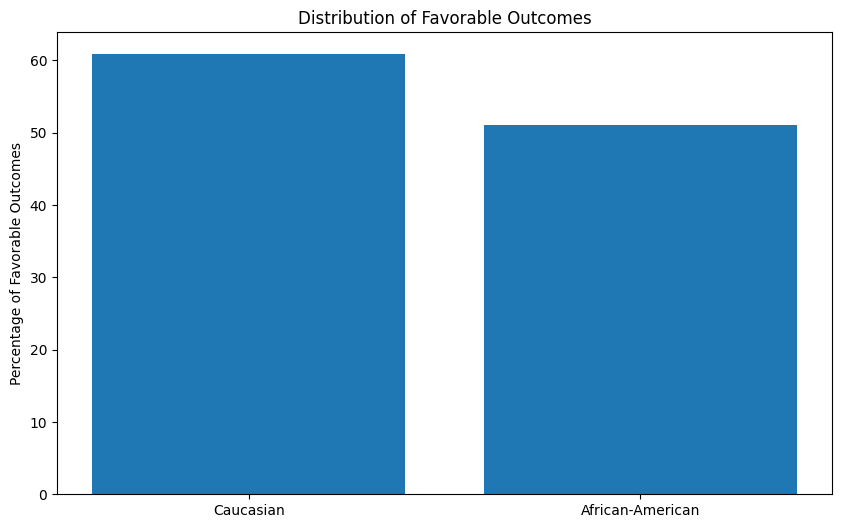

In [46]:
df, _ = dataset.convert_to_dataframe()

# Show distribution of favorable vs unfavorable outcomes
total_samples = len(df)
favorable_count = len(df[df['two_year_recid'] == dataset.favorable_label])
unfavorable_count = len(df[df['two_year_recid'] == dataset.unfavorable_label])

print("\nOutcome Distribution:")
print(f"Total samples: {total_samples}")
print(f"Favorable outcomes (no recidivism): {favorable_count} ({favorable_count/total_samples*100:.2f}%)")
print(f"Unfavorable outcomes (recidivism): {unfavorable_count} ({unfavorable_count/total_samples*100:.2f}%)")

# Show distribution by protected attribute (race)
print("\nOutcome Distribution by Race:")
print("Caucasian:")
caucasian_df = df[df['race'] == 1]
cauc_favorable = len(caucasian_df[caucasian_df['two_year_recid'] == dataset.favorable_label])
print(f"Favorable outcomes: {cauc_favorable/len(caucasian_df)*100:.2f}%")

print("\nAfrican-American:")
aa_df = df[df['race'] == 0]
aa_favorable = len(aa_df[aa_df['two_year_recid'] == dataset.favorable_label])
print(f"Favorable outcomes: {aa_favorable/len(aa_df)*100:.2f}%")

# plotting the above
import matplotlib.pyplot as plt

# Plot the distribution of favorable
plt.figure(figsize=(10, 6))
plt.bar(['Caucasian', 'African-American'], [cauc_favorable/len(caucasian_df)*100, aa_favorable/len(aa_df)*100])
plt.ylabel('Percentage of Favorable Outcomes')
plt.title('Distribution of Favorable Outcomes')
plt.show()



Fairness Metrics Analysis for Both Protected Attributes

RACE-BASED METRICS:
--------------------
Disparate Impact: 0.8404
Description: Ratio of favorable outcomes between unprivileged and privileged groups
Interpretation: A value of 1.0 indicates perfect fairness. Values < 1 suggest bias against unprivileged group


Statistical Parity Difference: -0.0971
Description: Difference in probability of favorable outcomes between groups
Interpretation: Value of 0 indicates perfect fairness. Negative values indicate bias against unprivileged group


Mean Difference: -0.0971
Description: Difference in mean predictions between privileged and unprivileged groups
Interpretation: Value of 0 indicates perfect fairness

SEX-BASED METRICS:
--------------------
Disparate Impact: 0.8029
Description: Ratio of favorable outcomes between unprivileged and privileged groups
Interpretation: A value of 1.0 indicates perfect fairness. Values < 1 suggest bias against unprivileged group


Statistical Parity Diffe

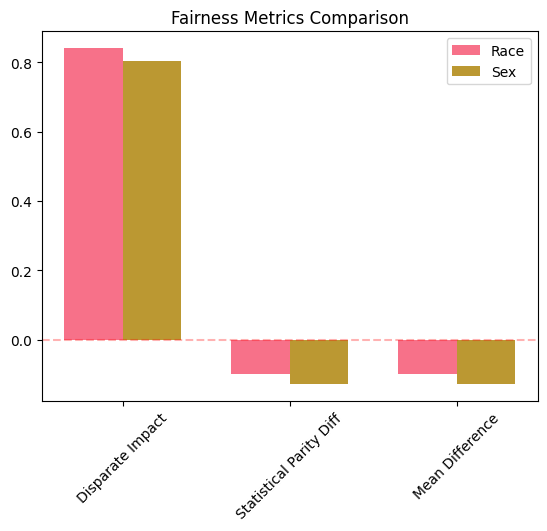


DETAILED GROUP STATISTICS

RACE STATISTICS:

Race - Caucasian:
Total samples: 2100
Favorable outcomes: 1278 (60.86%)
Unfavorable outcomes: 822 (39.14%)

Race - African-American:
Total samples: 4067
Favorable outcomes: 2080 (51.14%)
Unfavorable outcomes: 1987 (48.86%)

SEX STATISTICS:

Sex - Male:
Total samples: 1173
Favorable outcomes: 760 (64.79%)
Unfavorable outcomes: 413 (35.21%)

Sex - Female:
Total samples: 4994
Favorable outcomes: 2598 (52.02%)
Unfavorable outcomes: 2396 (47.98%)


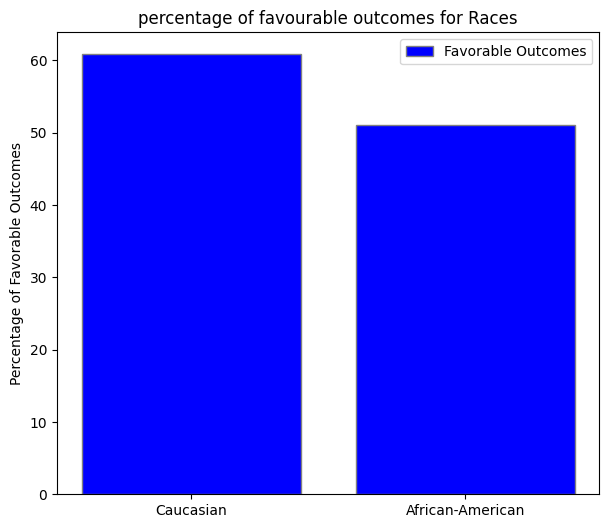

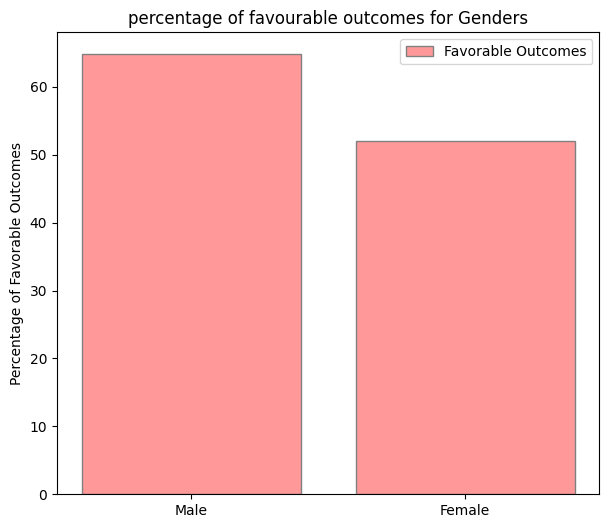


INTERSECTIONAL ANALYSIS (Race × Sex):
----------------------------------------

African-American Female:
Total samples: 3374
Favorable outcomes: 1630 (48.31%)

African-American Male:
Total samples: 693
Favorable outcomes: 450 (64.94%)

Caucasian Female:
Total samples: 1620
Favorable outcomes: 968 (59.75%)

Caucasian Male:
Total samples: 480
Favorable outcomes: 310 (64.58%)


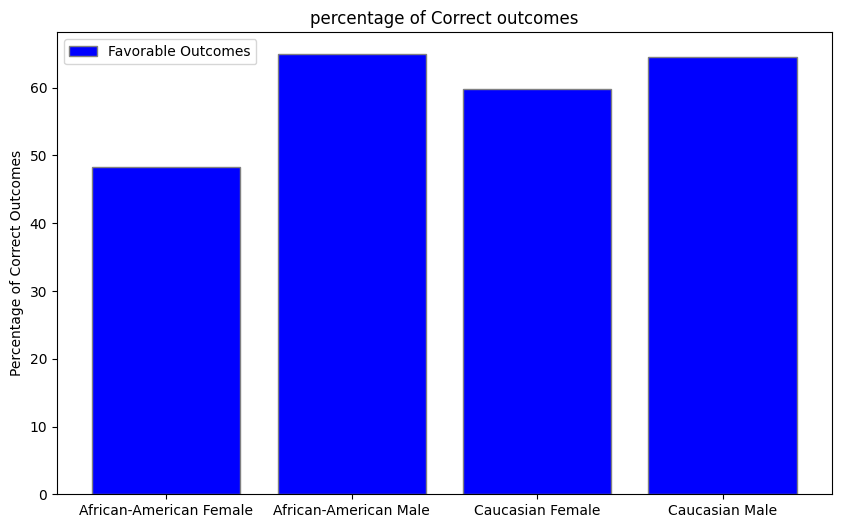

In [82]:
from aif360.datasets import CompasDataset
from aif360.metrics import BinaryLabelDatasetMetric
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the COMPAS dataset
dataset = CompasDataset()

# Define privileged and unprivileged groups for both protected attributes
privileged_groups_race = [{'race': 1}]  # Caucasian
unprivileged_groups_race = [{'race': 0}]  # African-American

privileged_groups_sex = [{'sex': 1}]  # Male
unprivileged_groups_sex = [{'sex': 0}]  # Female

# Calculate metrics for race
metrics_race = BinaryLabelDatasetMetric(
    dataset, 
    unprivileged_groups=unprivileged_groups_race,
    privileged_groups=privileged_groups_race
)

# Calculate metrics for sex
metrics_sex = BinaryLabelDatasetMetric(
    dataset, 
    unprivileged_groups=unprivileged_groups_sex,
    privileged_groups=privileged_groups_sex
)

print("Fairness Metrics Analysis for Both Protected Attributes")
print("=" * 50)

# Race-based metrics
print("\nRACE-BASED METRICS:")
print("-" * 20)

print(f"Disparate Impact: {metrics_race.disparate_impact():.4f}")
print("Description: Ratio of favorable outcomes between unprivileged and privileged groups")
print("Interpretation: A value of 1.0 indicates perfect fairness. Values < 1 suggest bias against unprivileged group")
print('\n')
print(f"Statistical Parity Difference: {metrics_race.statistical_parity_difference():.4f}")
print("Description: Difference in probability of favorable outcomes between groups")
print("Interpretation: Value of 0 indicates perfect fairness. Negative values indicate bias against unprivileged group")
print('\n')
print(f"Mean Difference: {metrics_race.mean_difference():.4f}")
print("Description: Difference in mean predictions between privileged and unprivileged groups")
print("Interpretation: Value of 0 indicates perfect fairness")


# Sex-based metrics
print("\nSEX-BASED METRICS:")
print("-" * 20)
print(f"Disparate Impact: {metrics_sex.disparate_impact():.4f}")
print("Description: Ratio of favorable outcomes between unprivileged and privileged groups")
print("Interpretation: A value of 1.0 indicates perfect fairness. Values < 1 suggest bias against unprivileged group")
print('\n')
print(f"Statistical Parity Difference: {metrics_sex.statistical_parity_difference():.4f}")
print("Description: Difference in probability of favorable outcomes between groups")
print("Interpretation: Value of 0 indicates perfect fairness. Negative values indicate bias against unprivileged group")
print('\n')

print(f"Mean Difference: {metrics_sex.mean_difference():.4f}")
print("Description: Difference in mean predictions between privileged and unprivileged groups")
print("Interpretation: Value of 0 indicates perfect fairness")
print('\n')

metrics_data = {
    'Disparate Impact': [metrics_race.disparate_impact(), metrics_sex.disparate_impact()],
    'Statistical Parity Diff': [metrics_race.statistical_parity_difference(), 
                               metrics_sex.statistical_parity_difference()],
    'Mean Difference': [metrics_race.mean_difference(), metrics_sex.mean_difference()]
}

x = np.arange(len(metrics_data))
width = 0.35

plt.bar(x - width/2, [metrics_data[m][0] for m in metrics_data.keys()], 
        width, label='Race')
plt.bar(x + width/2, [metrics_data[m][1] for m in metrics_data.keys()], 
        width, label='Sex')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.xticks(x, metrics_data.keys(), rotation=45)
plt.title('Fairness Metrics Comparison')
plt.legend()
plt.show()


# Get the dataset as a DataFrame for detailed analysis
df, _ = dataset.convert_to_dataframe()

# Calculate group-specific statistics
print("\nDETAILED GROUP STATISTICS")
print("=" * 50)

# Function to calculate statistics for each group
def calculate_group_stats(df, attribute, value, attribute_name, group_name):
    group_df = df[df[attribute] == value]
    total = len(group_df)
    favorable = len(group_df[group_df['two_year_recid'] == dataset.favorable_label])
    unfavorable = len(group_df[group_df['two_year_recid'] == dataset.unfavorable_label])
    
    print(f"\n{attribute_name} - {group_name}:")
    print(f"Total samples: {total}")
    print(f"Favorable outcomes: {favorable} ({favorable/total*100:.2f}%)")
    print(f"Unfavorable outcomes: {unfavorable} ({unfavorable/total*100:.2f}%)")
    # # plot the stats
    # plt.figure(figsize=(10, 6))
    # plt.bar(['Favorable', 'Unfavorable'], [favorable/total*100, unfavorable/total*100])
    # plt.ylabel('Percentage of Outcomes')
    # plt.title(f'Distribution of Outcomes for {group_name}')
    # plt.show()

    return total, favorable, unfavorable

# Race statistics
print("\nRACE STATISTICS:")
tot_Caucasian,fav_Caucasian,unfav_Caucasian=calculate_group_stats(df, 'race', 1, 'Race', 'Caucasian')
tot_African,fav_African,unfav_African=calculate_group_stats(df, 'race', 0, 'Race', 'African-American')

# Sex statistics
print("\nSEX STATISTICS:")
tot_Male,fav_Male,unfav_Male=calculate_group_stats(df, 'sex', 1, 'Sex', 'Male')
tot_Female,fav_Female,unfav_Female=calculate_group_stats(df, 'sex', 0, 'Sex', 'Female')

#plotting the above
import matplotlib.pyplot as plt
# plotting a bar chart with all the above stats
plt.figure(figsize=(7, 6))
bars1 = [fav_Caucasian/tot_Caucasian*100, fav_African/tot_African*100]
plt.bar(['Caucasian', 'African-American'],bars1, color='b', edgecolor='grey', label='Favorable Outcomes')
plt.ylabel('Percentage of Favorable Outcomes')
plt.title('percentage of favourable outcomes for Races')
plt.legend()
plt.show()
plt.figure(figsize=(7, 6))
bars2 = [fav_Male/tot_Male*100, fav_Female/tot_Female*100]
# light pink colour code - #FF9999 
plt.bar(['Male', 'Female'],bars2, color='#FF9999', edgecolor='grey', label='Favorable Outcomes')
plt.ylabel('Percentage of Favorable Outcomes')
plt.title('percentage of favourable outcomes for Genders')
plt.legend()
plt.show()


# Intersectional analysis (Race × Sex)
print("\nINTERSECTIONAL ANALYSIS (Race × Sex):")
print("-" * 40)
favourable_outcomes = dict()

for race in [0, 1]:
    for sex in [0, 1]:
        group_df = df[(df['race'] == race) & (df['sex'] == sex)]
        total = len(group_df)
        if total > 0:  # Check if group exists
            favorable = len(group_df[group_df['two_year_recid'] == dataset.favorable_label])
            race_label = "African-American" if race == 0 else "Caucasian"
            sex_label = "Female" if sex == 0 else "Male"
            favourable_outcomes[(race_label,sex_label)] = (total, favorable)
            print(f"\n{race_label} {sex_label}:")
            print(f"Total samples: {total}")
            print(f"Favorable outcomes: {favorable} ({favorable/total*100:.2f}%)")

#plotting the above using favourable_outcomes dict
import matplotlib.pyplot as plt
# plotting a bar chart with all the above stats
bars = [favourable_outcomes.keys(), [favourable_outcomes[k][1]/favourable_outcomes[k][0]*100 for k in favourable_outcomes.keys()]]
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(list(i+' '+j for i,j in favourable_outcomes.keys()),bars[1], color='b', edgecolor='grey', label='Favorable Outcomes')
plt.ylabel('Percentage of Correct Outcomes')
plt.title('percentage of Correct outcomes')
plt.legend()
plt.show()


<BarContainer object of 4 artists>

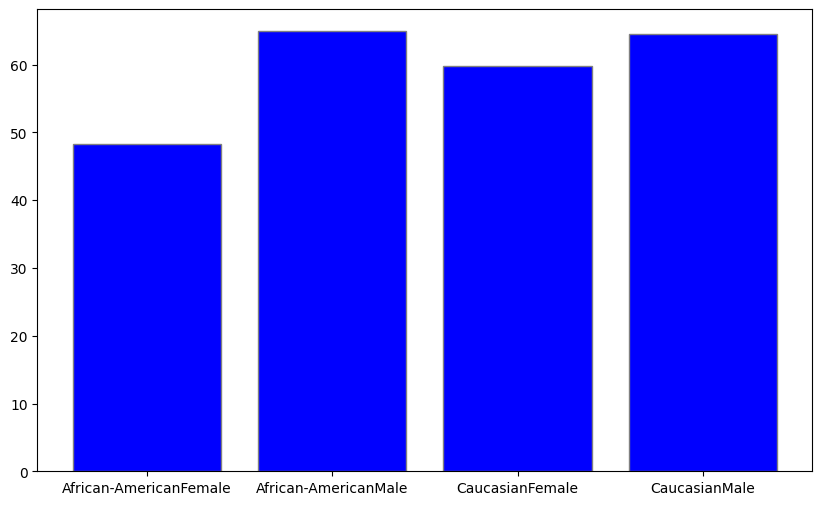

In [ ]:
bars = [favourable_outcomes.keys(), [favourable_outcomes[k][1]/favourable_outcomes[k][0]*100 for k in favourable_outcomes.keys()]]
# plt.bar(favourable_outcomes.keys(),bars[1], color='b', edgecolor='grey', label='Favorable Outcomes')


In [ ]:
!pip install seaborn

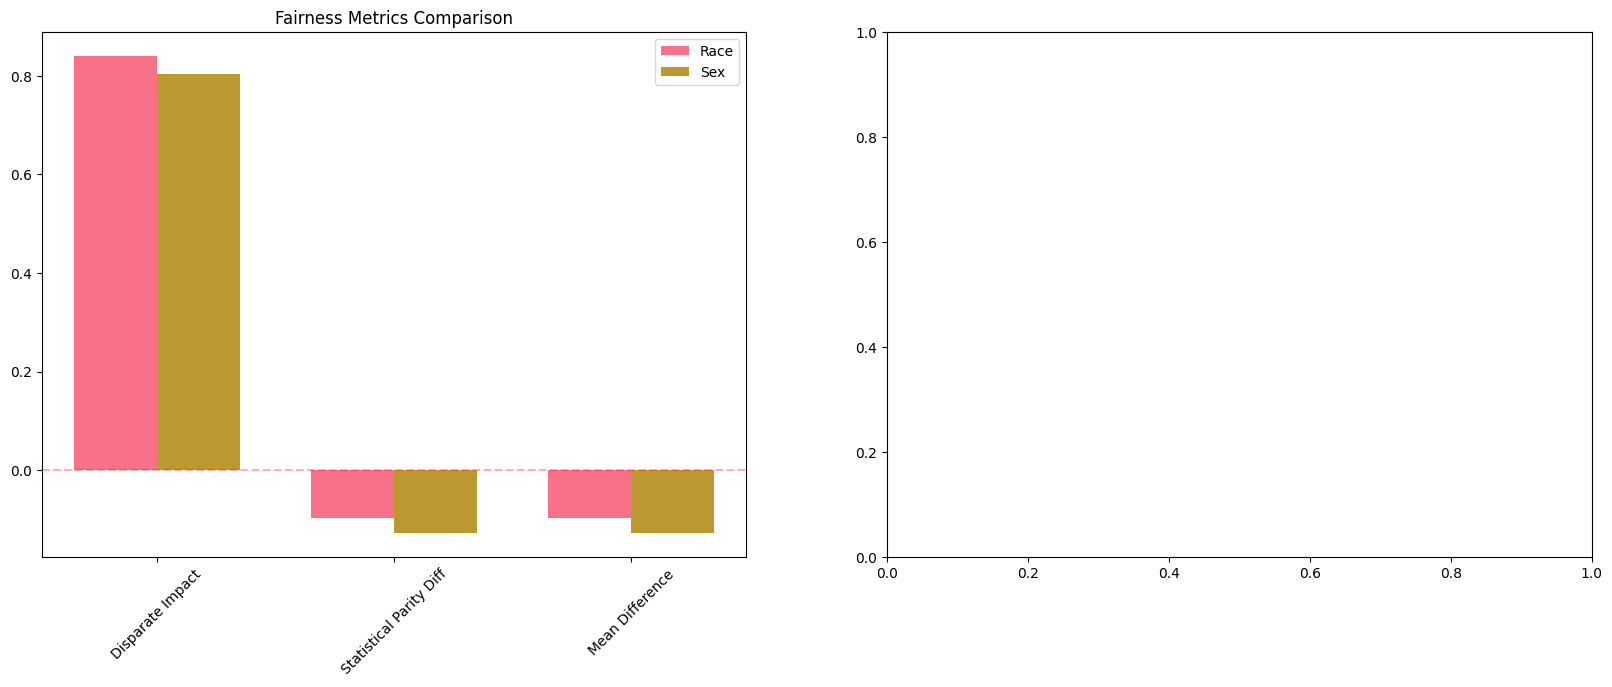

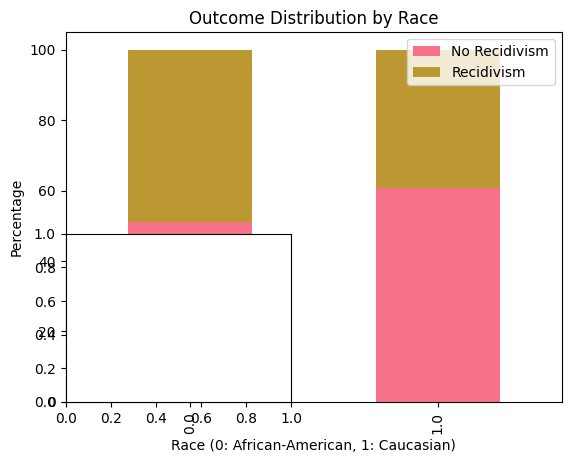

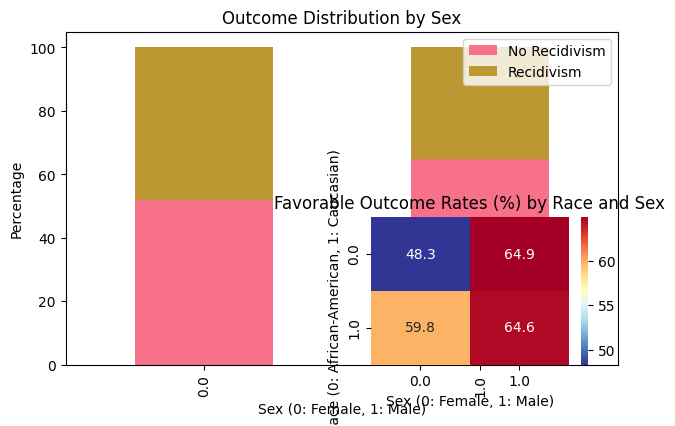

ValueError: Could not interpret value `decile_score` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from aif360.datasets import CompasDataset
# from aif360.metrics import BinaryLabelDatasetMetric
# import pandas as pd
# import numpy as np

# # Set style for better visualizations
# # plt.style.use('seaborn-whitegrid')
# sns.set_palette("husl")

# # Load the COMPAS dataset
# dataset = CompasDataset()
# df, _ = dataset.convert_to_dataframe()

# # Calculate metrics for both protected attributes
# privileged_groups_race = [{'race': 1}]
# unprivileged_groups_race = [{'race': 0}]
# privileged_groups_sex = [{'sex': 1}]
# unprivileged_groups_sex = [{'sex': 0}]

# metrics_race = BinaryLabelDatasetMetric(dataset, 
#                                       unprivileged_groups=unprivileged_groups_race,
#                                       privileged_groups=privileged_groups_race)

# metrics_sex = BinaryLabelDatasetMetric(dataset, 
#                                      unprivileged_groups=unprivileged_groups_sex,
#                                      privileged_groups=privileged_groups_sex)

# # Create a figure with multiple subplots
# plt.figure(figsize=(20, 15))

# # 1. Bar plot of fairness metrics comparison
# plt.subplot(2, 2, 1)
# metrics_data = {
#     'Disparate Impact': [metrics_race.disparate_impact(), metrics_sex.disparate_impact()],
#     'Statistical Parity Diff': [metrics_race.statistical_parity_difference(), 
#                                metrics_sex.statistical_parity_difference()],
#     'Mean Difference': [metrics_race.mean_difference(), metrics_sex.mean_difference()]
# }

# x = np.arange(len(metrics_data))
# width = 0.35

# plt.bar(x - width/2, [metrics_data[m][0] for m in metrics_data.keys()], 
#         width, label='Race')
# plt.bar(x + width/2, [metrics_data[m][1] for m in metrics_data.keys()], 
#         width, label='Sex')
# plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
# plt.xticks(x, metrics_data.keys(), rotation=45)
# plt.title('Fairness Metrics Comparison')
# plt.legend()

# # 2. Stacked bar chart for outcome distribution by race
# plt.subplot(2, 2, 2)
# race_outcomes = pd.crosstab(df['race'], df['two_year_recid'], normalize='index') * 100
# race_outcomes.plot(kind='bar', stacked=True)
# plt.title('Outcome Distribution by Race')
# plt.xlabel('Race (0: African-American, 1: Caucasian)')
# plt.ylabel('Percentage')
# plt.legend(['No Recidivism', 'Recidivism'])

# # 3. Stacked bar chart for outcome distribution by sex
# plt.subplot(2, 2, 3)
# sex_outcomes = pd.crosstab(df['sex'], df['two_year_recid'], normalize='index') * 100
# sex_outcomes.plot(kind='bar', stacked=True)
# plt.title('Outcome Distribution by Sex')
# plt.xlabel('Sex (0: Female, 1: Male)')
# plt.ylabel('Percentage')
# plt.legend(['No Recidivism', 'Recidivism'])

# # 4. Heatmap for intersectional analysis
# plt.subplot(2, 2, 4)
# intersectional_data = pd.pivot_table(
#     df,
#     values='two_year_recid',
#     index='race',
#     columns='sex',
#     aggfunc=lambda x: (x == dataset.favorable_label).mean() * 100
# )
# sns.heatmap(intersectional_data, annot=True, fmt='.1f', cmap='RdYlBu_r')
# plt.title('Favorable Outcome Rates (%) by Race and Sex')
# plt.xlabel('Sex (0: Female, 1: Male)')
# plt.ylabel('Race (0: African-American, 1: Caucasian)')

# plt.tight_layout()
# plt.show()

# # Additional visualization: Distribution of predictions over time
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='race', y='decile_score', data=df)
# plt.title('Distribution of Risk Scores by Race')
# plt.xlabel('Race (0: African-American, 1: Caucasian)')
# plt.ylabel('Decile Score (Higher = Higher Risk)')
# plt.show()

# # Create violin plots for a more detailed view of the distributions
# plt.figure(figsize=(15, 5))

# # Violin plot for race
# plt.subplot(1, 2, 1)
# sns.violinplot(x='race', y='decile_score', data=df)
# plt.title('Risk Score Distribution by Race')
# plt.xlabel('Race (0: African-American, 1: Caucasian)')
# plt.ylabel('Decile Score')

# # Violin plot for sex
# plt.subplot(1, 2, 2)
# sns.violinplot(x='sex', y='decile_score', data=df)
# plt.title('Risk Score Distribution by Sex')
# plt.xlabel('Sex (0: Female, 1: Male)')
# plt.ylabel('Decile Score')

# plt.tight_layout()
# plt.show()